Домашнее задание по эконометрике

Выполнили студенты  182 группы София Баграмян и Брусенский Валентин

1. «Взять языка». Возьми месячный временной ряд. Можно не один, а несколько, чтобы использовать дополнительные ряды как предикторы основного.

Воспользуемся данными сайта http://sophist.hse.ru/hse/nindex.shtml. 

В качестве основного исследуемого ряда будет использоваться UNEMPLDEC_M_SH (Норма безработицы на конец месяца, в %), в качестве дополнительного ряда – WAG_M_Q_SA (Индекс реальной зарплаты, с поправкой на сезонность, в %, нормирован к январю 2010 года). 

Рассматриваемый период: с января 2010 года по декабрь 2020 года с месячной периодичностью.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

Экспортируем данные

In [4]:
df = pd.read_excel('DZ_dannye.xlsx')

In [5]:
df.head()

,T,Date,UNEMPL_M_SH,WAG_M_SA
0,1,2010-01-01,9.0,100.000000
1,2,2010-02-01,8.5,100.497512
2,3,2010-03-01,8.5,100.845771
3,4,2010-04-01,8.1,101.144279
4,5,2010-05-01,7.2,101.542289


Преобразуем данные во временной ряд для более удобного анализа

In [6]:
df.index

RangeIndex(start=0, stop=132, step=1)

In [7]:
# Установим index для месячной периодичности
df.index = pd.PeriodIndex(df.Date, freq='M')

In [8]:
df.head()

,T,Date,UNEMPL_M_SH,WAG_M_SA
Date,,,,
2010-01,1,2010-01-01,9.0,100.000000
2010-02,2,2010-02-01,8.5,100.497512
2010-03,3,2010-03-01,8.5,100.845771
2010-04,4,2010-04-01,8.1,101.144279
2010-05,5,2010-05-01,7.2,101.542289


2. «Намалевич». Построй графики рядов, графики автокорреляционных функций, графики с нарезкой ряда на годы для иллюстрации сезонности.



*   Графики рядов




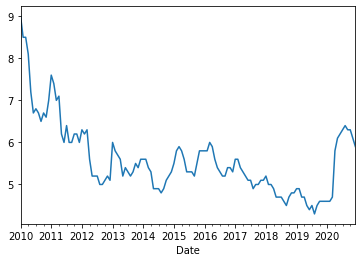

In [9]:
# Ряд безработицы
df.UNEMPL_M_SH.plot()

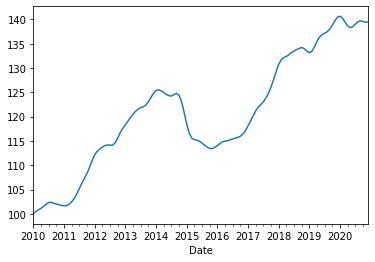

In [10]:
# Ряд индекса заработной платы
df.WAG_M_SA.plot()



*   Графики автокорреляционной функции



In [11]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

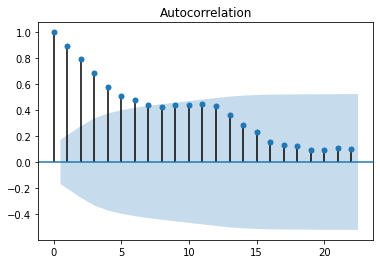

In [12]:
# ACF для ряда безработицы
plot_acf(df.UNEMPL_M_SH)
pyplot.show()

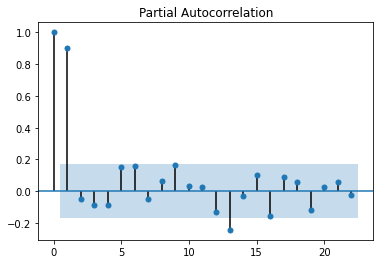

In [21]:
# PACF для ряда безработицы
plot_pacf(df.UNEMPL_M_SH)
pyplot.show()

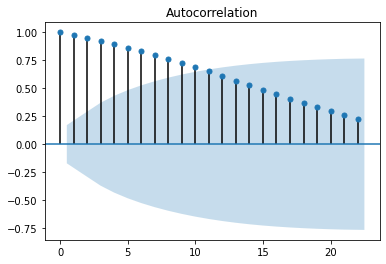

In [22]:
# ACF для ряда индекса заработной платы
plot_acf(df.WAG_M_SA)
pyplot.show()

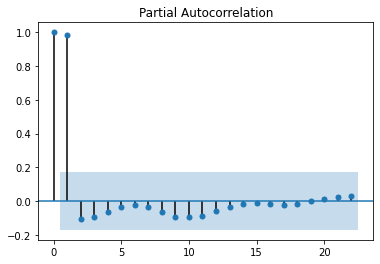

In [23]:
# PACF для ряда индекса заработной платы
plot_pacf(df.WAG_M_SA)
pyplot.show()


*   Графики с нарезкой ряда на годы для иллюстрации сезонности



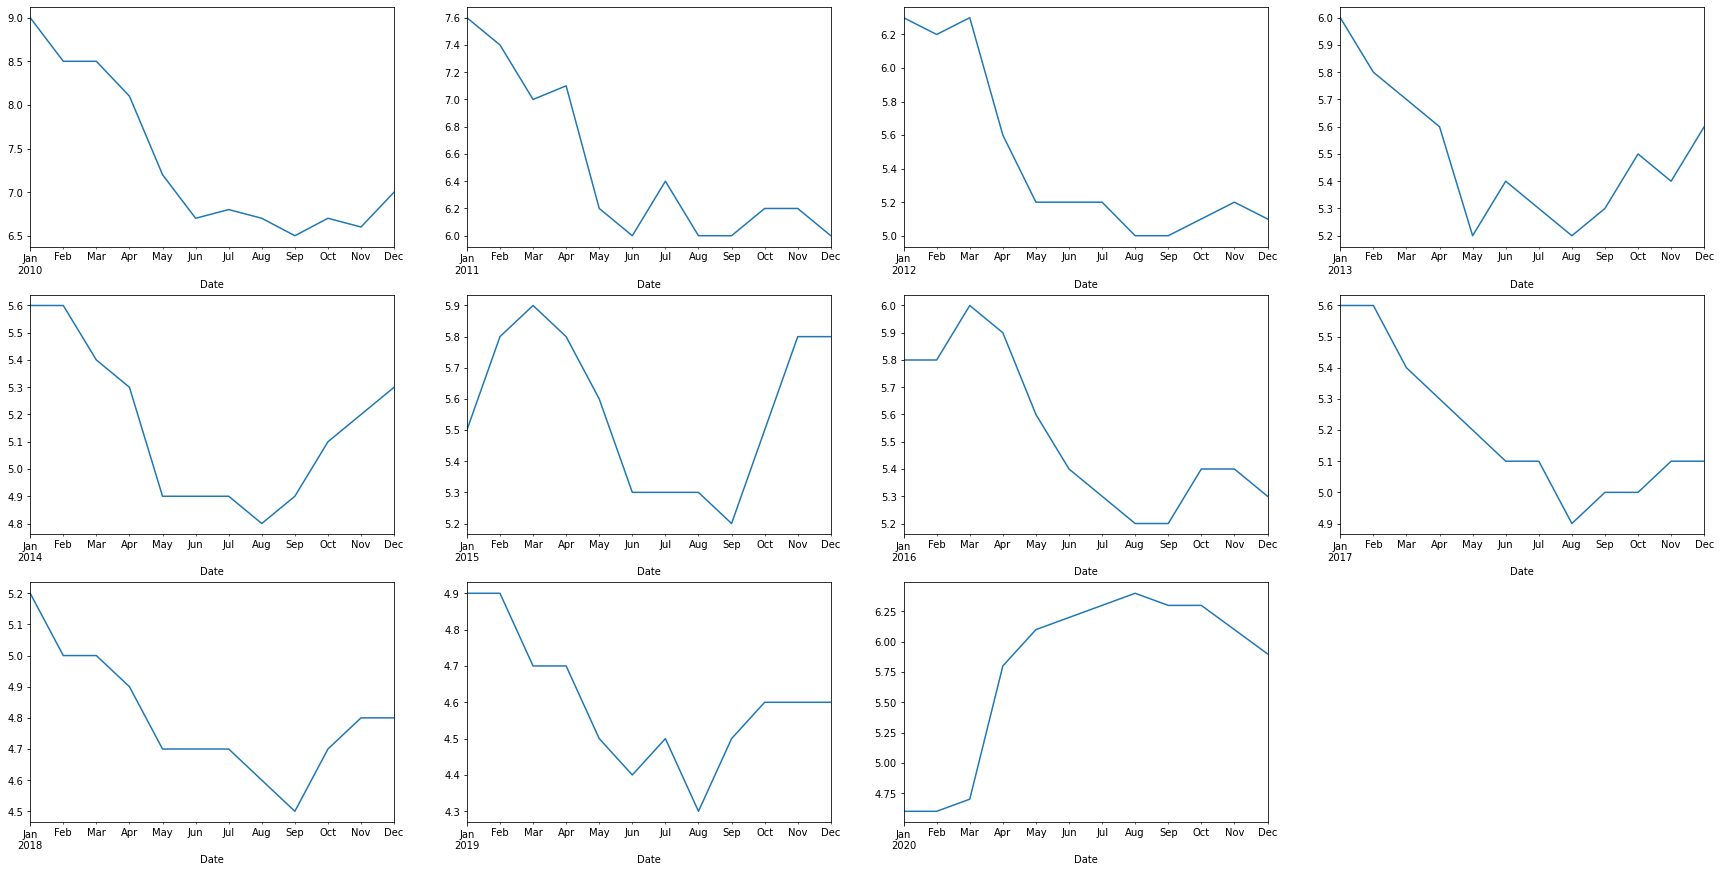

In [42]:
# Для ряда безработицы
plt.figure(figsize= [30, 15])
plt.subplot(3, 4, 1)
df.UNEMPL_M_SH[0:12].plot()
plt.subplot(3, 4, 2)
df.UNEMPL_M_SH[12:24].plot()
plt.subplot(3, 4, 3)
df.UNEMPL_M_SH[24:36].plot()
plt.subplot(3, 4, 4)
df.UNEMPL_M_SH[36:48].plot()
plt.subplot(3, 4, 5)
df.UNEMPL_M_SH[48:60].plot()
plt.subplot(3, 4, 6)
df.UNEMPL_M_SH[60:72].plot()
plt.subplot(3, 4, 7)
df.UNEMPL_M_SH[72:84].plot()
plt.subplot(3, 4, 8)
df.UNEMPL_M_SH[84:96].plot()
plt.subplot(3, 4, 9)
df.UNEMPL_M_SH[96:108].plot()
plt.subplot(3, 4, 10)
df.UNEMPL_M_SH[108:120].plot()
plt.subplot(3, 4, 11)
df.UNEMPL_M_SH[120:132].plot()

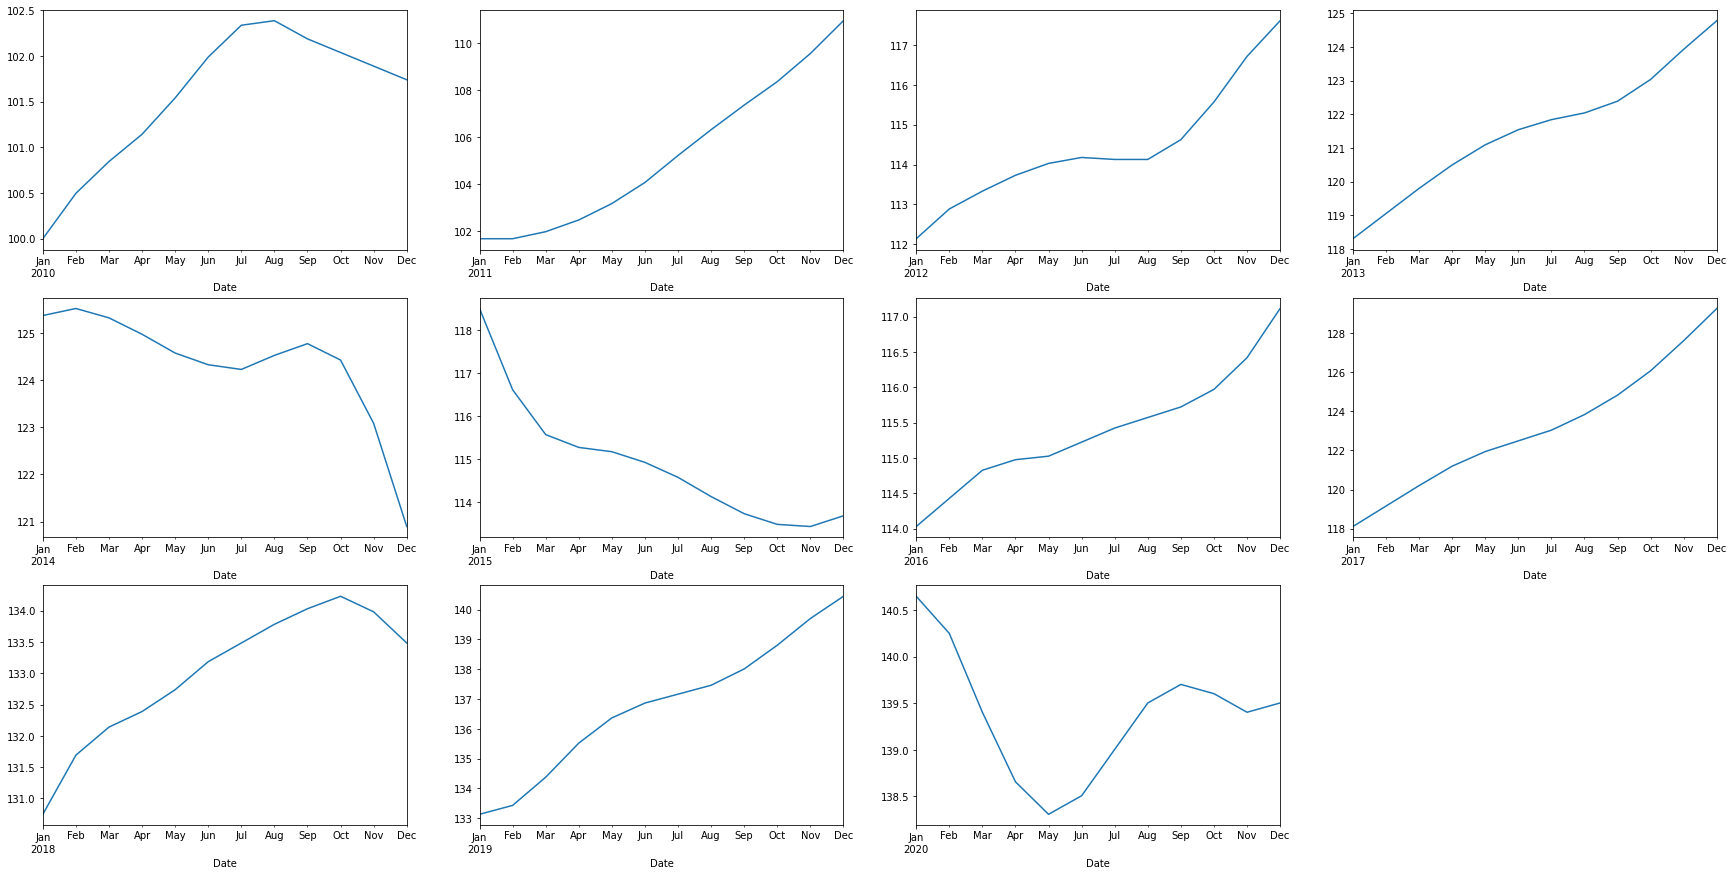

In [41]:
# Для ряда индекса заработной платы
plt.figure(figsize= [30, 15])
plt.subplot(3, 4, 1)
df.WAG_M_SA[0:12].plot()
plt.subplot(3, 4, 2)
df.WAG_M_SA[12:24].plot()
plt.subplot(3, 4, 3)
df.WAG_M_SA[24:36].plot()
plt.subplot(3, 4, 4)
df.WAG_M_SA[36:48].plot()
plt.subplot(3, 4, 5)
df.WAG_M_SA[48:60].plot()
plt.subplot(3, 4, 6)
df.WAG_M_SA[60:72].plot()
plt.subplot(3, 4, 7)
df.WAG_M_SA[72:84].plot()
plt.subplot(3, 4, 8)
df.WAG_M_SA[84:96].plot()
plt.subplot(3, 4, 9)
df.WAG_M_SA[96:108].plot()
plt.subplot(3, 4, 10)
df.WAG_M_SA[108:120].plot()
plt.subplot(3, 4, 11)
df.WAG_M_SA[120:132].plot()

3. «Твиттер». Кратко прокомментируй полученные графики. Явлются ли ряды сезонными? есть ли тренд? стационарны ли ряды? есть ли точки излома? растёт ли амплитуда колебаний ряда? Возьми логарифм ряда, если душа тянется к логарифму.



*   Ряд безработицы

Визуально можно предположить о наличии сезонного тренда у ряда безработицы, поскольку для нарезанных по годам графиков характерен всплеск безработицы в начале года (январь-февраль), сокращение к лету и снова рост к декабрю. Это справедливо почти для всех лет. Такую динамику можно объяснить сезонным характером безработицы и существовавние работ только в летний период. На РACF также можно увидеть выходящее за пределы доверительного интервала значение на 12 лаге. 

Для ряда четко прослеживается нисходящий тренд с 2010 по 2020 года. Только в 2021 году произошел скачок. Из этого можно сделать вывод о нестационарности ряда (возможна тренд-стационарность). 

Точку излома можно обнаружить в начале 2021 года, когда безработица резко выросла.

Амплитуда колебаний с 2010 по 2020 года визуально снижалась, что может говорить о снижении волатильности ряда безработицы. Для сглаживания можно применить логарифмическое преобразование.



*   Ряд индекса заработной платы

Сезонность визуально не наблюдается для индекса заработной платы, что и неудивительно – для реальной зарплаты не характерен регулярный подъём в одно время, а спад в другое. Нарезанные на года графики демонстрируют либо постоянный рост, либо снижение, а на PACF после 2 лага за пределами доверительного интервала нет ни одного значения.

Ряд четко демонстрирует восходящий тренд на всем протяжении, о чем также говорит медленное убывание графика автокорреляционной функции. Это может говорить о нестационарности ряда (возможна тренд-стационарность).

Точку излома можно обнаружить в середине 2014 года, когда индекса заработной платы значительно снизился и далее продолжил снова возрастающую динамику.

Амплитуда колебаний в целом постоянно на всем промежутке. Однако можно взять логарифм, чтобы оба исследуемых ряда были в одном виде.


In [19]:
df['ln_unem'] = np.log(df.UNEMPL_M_SH)
df['ln_wage'] = np.log(df.WAG_M_SA)
df.head()

,T,Date,UNEMPL_M_SH,WAG_M_SA,ln_unem,ln_wage
Date,,,,,,
2010-01,1,2010-01-01,9.0,100.000000,2.197225,4.605170
2010-02,2,2010-02-01,8.5,100.497512,2.140066,4.610133
2010-03,3,2010-03-01,8.5,100.845771,2.140066,4.613592
2010-04,4,2010-04-01,8.1,101.144279,2.091864,4.616548
2010-05,5,2010-05-01,7.2,101.542289,1.974081,4.620475


4. «Двенадцать месяцев». Необходимо исследовать качество прогнозов минимум 6 моделей:

• Наивная, yˆt+1 = yt.

• Сезонная наивная, yˆt+1 = yt+1−12.

• SARIMA(1, 1, 1)(1, 0, 0)[12].

• Алгоритм Хиндмана-Хандакара автоматического подбора SARIMA.

• ETS(AAA)

• ETS с автоматическим выбором по AIC.

Сравни качество прогнозов по средней абсолютной ошибке MAE на тестовой выборке. В качестве тестовой выборки возьми последний год наблюдений, в качестве обучающей — все остальные наблюдения.

In [23]:
# разделим выборку на обучающую и тестовую
unemp_train = df.ln_unem[0:120]
unemp_test = df.ln_unem[120:]
wage_train = df.ln_wage[0:120]
wage_test = df.ln_wage[120:]

In [ ]:
pip install sktime

In [ ]:
pip install pmdarima

Мы будем предсказывать значения безработицы с использованием дополнительного ряда индекса заработных плат

In [68]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteError,
    mean_absolute_error)

In [34]:
fh = ForecastingHorizon(unemp_test.index, is_relative=False)
fh

ForecastingHorizon(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', name='Date', freq='M', is_relative=False)

# **1) Наивная модель**

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4d332ee90>)

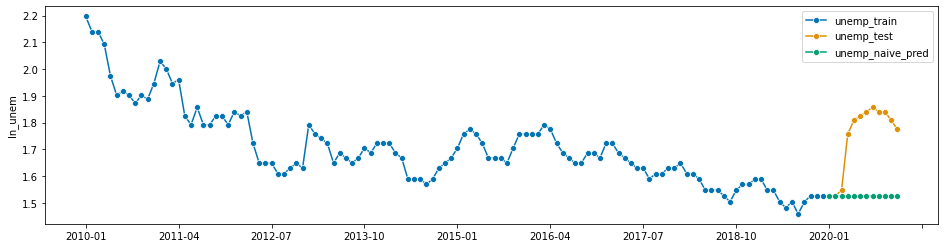

In [45]:
naive_forecaster = NaiveForecaster(strategy="last")
naive_forecaster.fit(unemp_train, X=wage_train)
unemp_naive_pred = naive_forecaster.predict(fh)
plot_series(unemp_train, unemp_test, unemp_naive_pred, labels=["unemp_train", "unemp_test", "unemp_naive_pred"])

In [46]:
print("MAE Наивная модель:", mean_absolute_error(unemp_naive_pred, unemp_test))

MAE Наивная модель: 0.2199069555997694


# **2) Сезонная наивная**

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4d33a1290>)

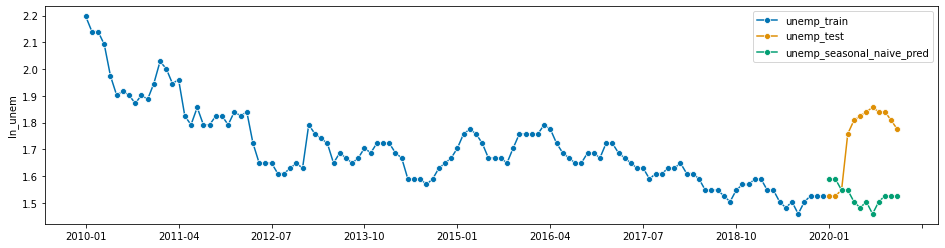

In [47]:
seasonal_naive_forecaster = NaiveForecaster(strategy="last", sp=12)
seasonal_naive_forecaster.fit(unemp_train, X=wage_train)
unemp_seasonal_naive_pred = seasonal_naive_forecaster.predict(fh)
plot_series(unemp_train, unemp_test, unemp_seasonal_naive_pred, labels=["unemp_train", "unemp_test", "unemp_seasonal_naive_pred"])

In [48]:
print("MAE Сезонная наивная модель:", mean_absolute_error(unemp_seasonal_naive_pred, unemp_test))

MAE Сезонная наивная модель: 0.24167155196008827


# **3) SARIMA(1, 1, 1,)(1, 0, 0)[12]**

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4d337a690>)

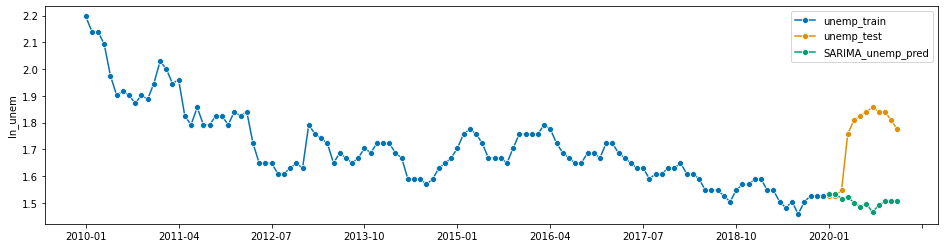

In [54]:
SARIMA_forecaster = ARIMA(
    order=(1, 1, 1), seasonal_order=(1, 0, 0, 12), suppress_warnings=True
)
SARIMA_forecaster.fit(unemp_train, X=pd.DataFrame(wage_train))
SARIMA_unemp_pred = SARIMA_forecaster.predict(fh, X=pd.DataFrame(wage_test))
plot_series(unemp_train, unemp_test, SARIMA_unemp_pred, labels=["unemp_train", "unemp_test", "SARIMA_unemp_pred"])

In [55]:
print("MAE SARIMA(1,1,1)(1,0,0)[12]:", mean_absolute_error(SARIMA_unemp_pred, unemp_test))

MAE SARIMA(1,1,1)(1,0,0)[12]: 0.24297851481301672


# **4) Алгоритм Хиндмана-Хандакара автоматического подбора SARIMA**

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4d33524d0>)

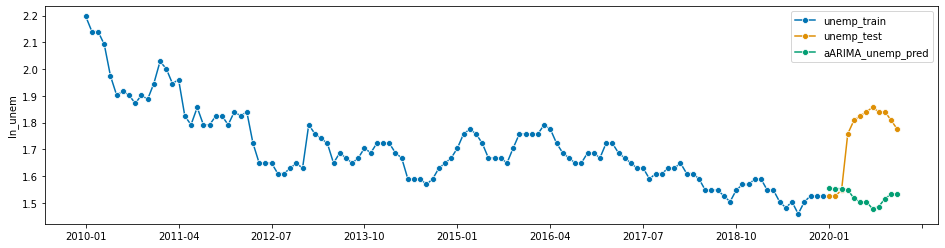

In [57]:
aARIMA_forecaster = AutoARIMA(sp=12, suppress_warnings=True)
aARIMA_forecaster.fit(unemp_train, X=pd.DataFrame(wage_train))
aARIMA_unemp_pred = aARIMA_forecaster.predict(fh, X=pd.DataFrame(wage_test))
plot_series(unemp_train, unemp_test, aARIMA_unemp_pred, labels=["unemp_train", "unemp_test", "aARIMA_unemp_pred"])

In [58]:
aARIMA_forecaster.get_params()

{'D': None,
 'alpha': 0.05,
 'd': None,
 'error_action': 'warn',
 'information_criterion': 'aic',
 'max_D': 1,
 'max_P': 2,
 'max_Q': 2,
 'max_d': 2,
 'max_order': 5,
 'max_p': 5,
 'max_q': 5,
 'maxiter': 50,
 'method': 'lbfgs',
 'n_fits': 10,
 'n_jobs': 1,
 'offset_test_args': None,
 'out_of_sample_size': 0,
 'random': False,
 'random_state': None,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal': True,
 'seasonal_test': 'ocsb',
 'seasonal_test_args': None,
 'sp': 12,
 'start_P': 1,
 'start_Q': 1,
 'start_p': 2,
 'start_params': None,
 'start_q': 2,
 'stationary': False,
 'stepwise': True,
 'suppress_warnings': True,
 'test': 'kpss',
 'trace': False,
 'trend': None,
 'with_intercept': True}

In [59]:
print("MAE autoSARIMA:", mean_absolute_error(aARIMA_unemp_pred, unemp_test))

MAE autoSARIMA: 0.23277460019143956


# **5) ETS(AAA)**

In [ ]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4d04fb910>)

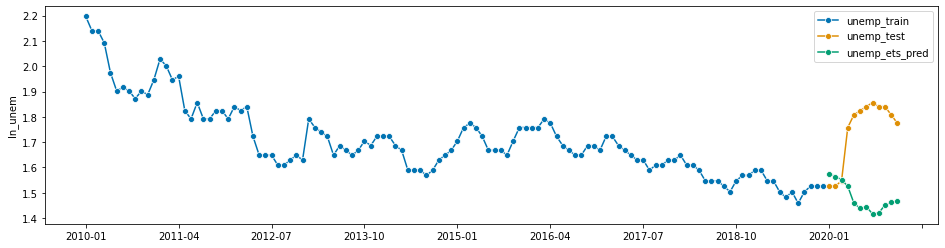

In [94]:
ets_forecaster = ETSModel(unemp_train, error ='add', trend="add", seasonal="additive")
ets_fit = ets_forecaster.fit()
unemp_ets_pred = ets_fit.get_prediction(start='2020-01', end='2020-12')
unemp_ets_pred = unemp_ets_pred.summary_frame(alpha=0.05)
plot_series(unemp_train, unemp_test, unemp_ets_pred['mean'], labels=["unemp_train", "unemp_test", "unemp_ets_pred"])

In [96]:
print("MAE ETS(AAA):", mean_absolute_error(unemp_ets_pred['mean'], unemp_test))

MAE ETS(AAA): 0.27993258710487107


# **6) ETS с автоматическим выбором по AIC**

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4d0387150>)

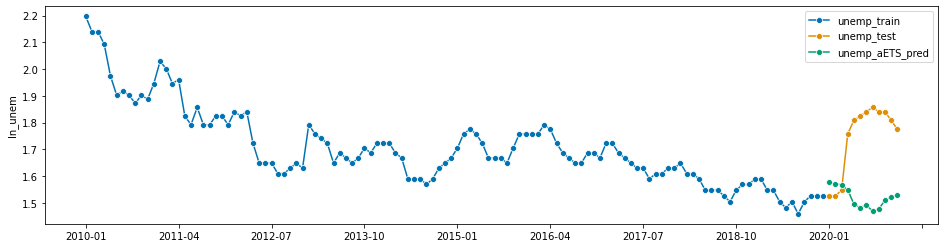

In [98]:
from sktime.forecasting.ets import AutoETS

aETS_forecaster = AutoETS(auto=True, sp=12, information_criterion='aic', n_jobs=-1)
aETS_forecaster.fit(unemp_train, X=wage_train)
unemp_aETS_pred = aETS_forecaster.predict(fh)
plot_series(unemp_train, unemp_test, unemp_aETS_pred, labels=["unemp_train", "unemp_test", "unemp_aETS_pred"])

In [99]:
print("MAE Auto ETS:", mean_absolute_error(unemp_aETS_pred, unemp_test))

MAE Auto ETS: 0.24539065233542914


Таким образом, мы построили 6 моделей прогнозирования временных рядов. Наименьший МАЕ продемонстрировала, на удилвение, наивная модель (0,21), а наибольшую - ETS(AAA) (0,28). Это можно объяснить тем, что в 2021 рост безработицы был резким и намного отличающимся от общего тренда за 2010-2019, поэтому все модели показали не совсем точный прогноз. Они опирались на предыдущую динамику, а на в реальности безработица в 2020 году оказалась совсем не похожа на то, что происходио ранее.

5. «Кто на свете всех милее?» Выбери наилучшую модель и построй график прогнозов для неё на один год вперёд использовав все 100% наблюдений как обучающую выборку.

Для построения прогноза выбираем наивную модель.

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4d0040910>)

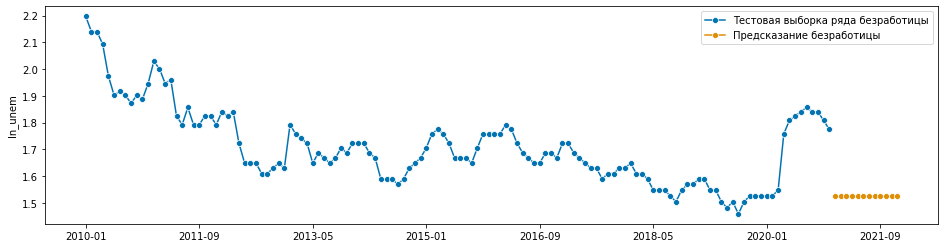

In [109]:
fh1 = np.arange(len(unemp_test))+13
naive_forecaster_fin = NaiveForecaster(strategy='last')
naive_forecaster_fin.fit(df.ln_unem, X=df.ln_wage)
unemp_naivef_pred = naive_forecaster.predict(fh1)
plot_series(df.ln_unem, unemp_naivef_pred, labels=["Тестовая выборка ряда безработицы", "Предсказание безработицы"])

In [112]:
np.exp(unemp_naivef_pred)

2021-01    4.6
2021-02    4.6
2021-03    4.6
2021-04    4.6
2021-05    4.6
2021-06    4.6
2021-07    4.6
2021-08    4.6
2021-09    4.6
2021-10    4.6
2021-11    4.6
2021-12    4.6
Freq: M, dtype: float64

6. «Хождение в народ». Скачай панельные данные RLMS. Можешь выбрать данные по домохозяйствам, а можешь по индивидам, https://www.hse.ru/rlms/.

Для данной части мы возьмем данные по домохозяйствам за период с 1994 по 2019 года. Так как данные публикуются в формате .dta, мы воспользуемся STATA для трансформации их в .xlsx файл для открытия в Python.

In [131]:
# Загружаем данные
dfp = pd.read_excel('dz4_panel.xlsx')
dfp.head()

,ID_W,ID_H,nfm,F11
0,1994,1001,2,62000.0
1,1994,1002,4,300000.0
2,1994,1003,1,140000.0
3,1994,1004,1,NaN
4,1994,1005,2,650000.0


In [132]:
panel_data = dfp.set_index(['ID_H', 'ID_W'])
print(panel_data.head())

           nfm       F11
ID_H ID_W               
1001 1994    2   62000.0
1002 1994    4  300000.0
1003 1994    1  140000.0
1004 1994    1       NaN
1005 1994    2  650000.0


7. «Кому на Руси жить хорошо?». Сформулируй пусть не особо глубокий, но всё же вопрос. Уровня «Помогает ли потребление огурцов домодчадцами предсказать доход главы семейства?» вполне достаточно. В данных RLMS много пропусков, поэтому погоня за большим количество предикторов приведёт к выбрасыванию всех наблюдений. Для данного игрового задания одного предиктора достаточно.


Сформулируем исследовательский вопрос для анализа: Помогает ли информация о количестве членом семьи (переменная nfm) предсказать уровень доходов семьи в месяц (переменная F11)?

8. «Сделай красиво!» Визуализируй данные с целью графического ответа на поставленный вопрос.

In [ ]:
a = panel_data.groupby('ID_W').mean()
a

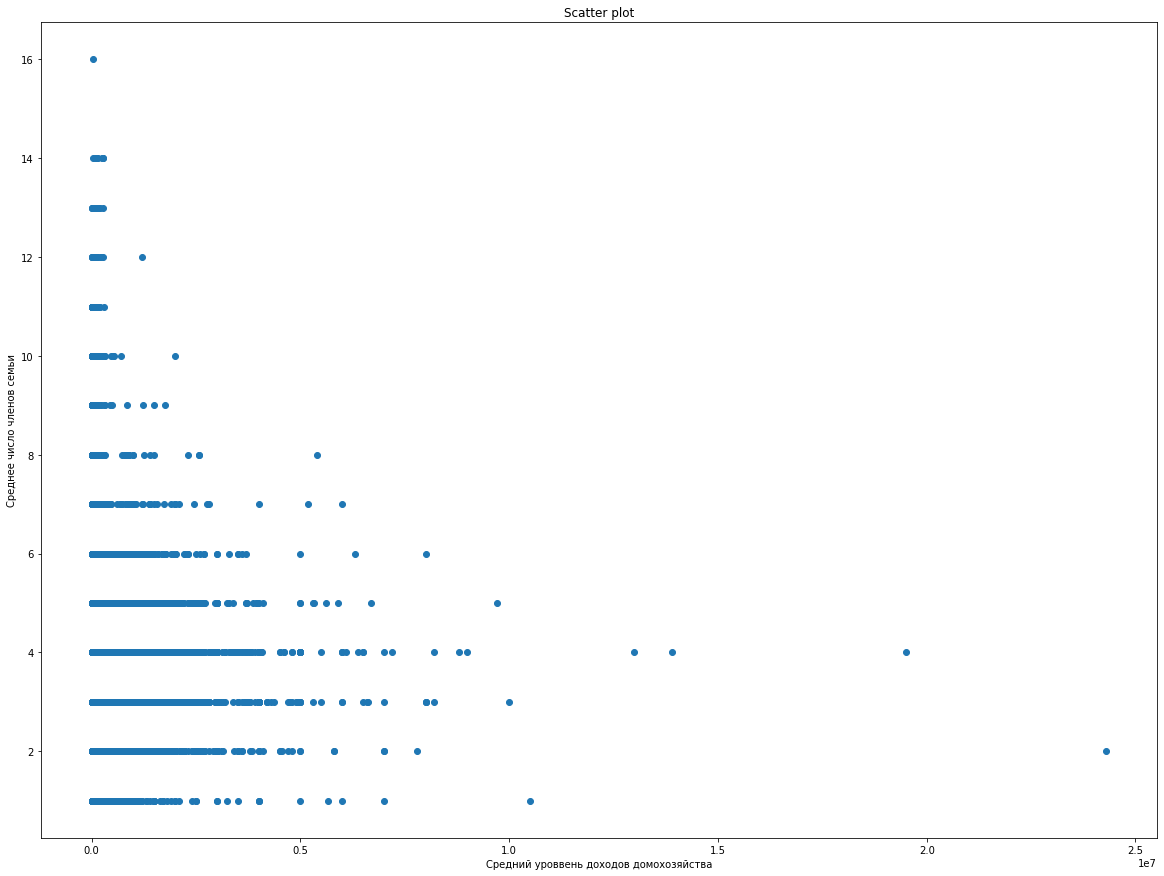

In [142]:
import matplotlib
plt.figure(figsize=[20,15])
matplotlib.pyplot.scatter(panel_data['F11'], panel_data['nfm'])
plt.title('Scatter plot')
plt.ylabel('Среднее число членов семьи')
plt.xlabel('Средний уроввень доходов домохозяйства')
plt.show()

9. «Три сестры». Оцени три модели: сквозную модель, FE-модель, RE-модель. С помощью подходящих тестов выбери наилучшую.

In [ ]:
pip install linearmodels

In [151]:
# Сквозная модель
from linearmodels.panel import PooledOLS
pooled = PooledOLS(panel_data.F11, panel_data.nfm)
print(pooled.fit())

/usr/local/lib/python3.7/dist-packages/linearmodels/shared/exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


                          PooledOLS Estimation Summary                          
Dep. Variable:                    F11   R-squared:                        0.0574
Estimator:                  PooledOLS   R-squared (Between):              0.0866
No. Observations:               93853   R-squared (Within):               0.0054
Date:                Mon, Jun 14 2021   R-squared (Overall):              0.0574
Time:                        15:39:16   Log-likelihood                -1.327e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5718.6
Entities:                       25689   P-value                           0.0000
Avg Obs:                       3.6534   Distribution:                 F(1,93852)
Min Obs:                       1.0000                                           
Max Obs:                       19.000   F-statistic (robust):             5718.6
                            

In [153]:
# FE-модель
from linearmodels.panel import PanelOLS
panel_ols = PanelOLS(panel_data.F11, panel_data.nfm, entity_effects=True)
print(panel_ols.fit())

/usr/local/lib/python3.7/dist-packages/linearmodels/shared/exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


                          PanelOLS Estimation Summary                           
Dep. Variable:                    F11   R-squared:                        0.0057
Estimator:                   PanelOLS   R-squared (Between):              0.0893
No. Observations:               93853   R-squared (Within):               0.0057
Date:                Mon, Jun 14 2021   R-squared (Overall):              0.0533
Time:                        15:41:21   Log-likelihood                -1.303e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      388.89
Entities:                       25689   P-value                           0.0000
Avg Obs:                       3.6534   Distribution:                 F(1,68163)
Min Obs:                       1.0000                                           
Max Obs:                       19.000   F-statistic (robust):             388.89
                            

In [154]:
# RE-модель
from linearmodels.panel import RandomEffects
randomol = RandomEffects(panel_data.F11, panel_data.nfm)
print(randomol.fit())

/usr/local/lib/python3.7/dist-packages/linearmodels/shared/exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


                        RandomEffects Estimation Summary                        
Dep. Variable:                    F11   R-squared:                        0.0295
Estimator:              RandomEffects   R-squared (Between):              0.0888
No. Observations:               93853   R-squared (Within):               0.0056
Date:                Mon, Jun 14 2021   R-squared (Overall):              0.0567
Time:                        15:42:30   Log-likelihood                -1.316e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2851.2
Entities:                       25689   P-value                           0.0000
Avg Obs:                       3.6534   Distribution:                 F(1,93852)
Min Obs:                       1.0000                                           
Max Obs:                       19.000   F-statistic (robust):             2851.2
                            

* Сравним модель с детерминированными эффектами и сквозную регрессию. Для этого с помощью F-теста, который вычисляется автоматически после оценки регрессии FE, нужно проверить гипотезу о равенстве индивидуальных эффектов:

Н0: a1 = … = aN

H1: существует ai ≠ aj

Мы видим, что при любом разумном уровне значимости отвергается нулевая гипотеза о равенстве всех индивидуальных эффектов друг другу. Значит, между домохозяйствами существует индивидуальная разница, поэтому модель с детерминированными индивидуальными эффектами лучше, чем модель сквозной регрессии.



* Сравним модель с детерминированными индивидуальными эффектами и модель со случайными индивидуальными эффектами. Сделать это можно с помощью теста Хаусмана, проверяющего существенность разницы между оценками двух моделей:

H0: corr(ai, Xit) = 0 => обе модели дают состоятельные оценки, их разность мала, лучше модель со случайными эффектами.

H1: corr(ai, Xit) ≠ 0 => только модель с детерминированными эффектами даёт состоятельные оценки, разность между двумя моделями велика, лучше модель с детерминированными эффектами.

Тест был проведен в R. Хи-квадрат статистика равна 3.09, а p-value = 0.8768. Следовательно, основная гипотеза о состоятельности оценок обеих моделей не отвергается на любом разумном уровне значимости. В таком случае модель со случайными индивидуальными эффектами лучше, чем модель с детерминированными индивидуальными эффектами, так как оценки первой более эффективны.

10. «Ответ на главный вопрос». Ответь на поставленный вопрос

Таким образом, мы сравнили сквозную регрессию, модель с детерминированными индивидуальными эффектами и модель со случайными индивидуальными эффектами. Обе модели с индивидуальными эффектами оказались лучше сквозной регрессии, при этом тест Хаусмана показал состоятельность оценок модели со случайными эффектами, ввиду чего эта модель оказалась лучше модели с фиксированными эффектами. Следовательно, в данных присутствует влияние пропущенных или ненаблюдаемых переменных, характеризующих особенности домохозяйств, при этом различия между домохозяйствами носят случайный характер и отличаются от года к году.

Анализируя регрессию со случайными эффектами, можем заметить, что регрессия является адекватной при любом разумном уровне значимости, так как соответствующая F-статистика 2851, а p-value близко к 0. При любом разумном уровне значимости переменная о числе членов в семье является значимой. Поэтому отвечая на исследовательский вопрос, мы можем утверждать, что информация о количестве членов семьи помогает предсказать доход домохозяйства. Проинтерпретировать ее можно следующим образом: при увеличении членов в семье на 1 человека доход семьи в месяц в среднем возрастает на 2,704*exp(4) при прочих равных условиях.